In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import matplotlib.dates as mdates
import datetime
from uk_covid19 import Cov19API

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
colors = ['#006FED', '#E03424', 'gray', '#009966', '#000866', '#336600', '#006633', 'm', 'r']

In [4]:
metrics = [
    "newCasesByPublishDate",
    "newCasesBySpecimenDate",
    "newDeathsByDeathDate",
    "uniquePeopleTestedBySpecimenDateRollingSum",
    "uniqueCasePositivityBySpecimenDateRollingSum",
    "newDeaths28DaysByPublishDate",
    "newDeaths28DaysByDeathDate",
]

In [5]:
structure = {
    "date": "date",
    "areaName": "areaName",
}
for metric in metrics:
    structure[metric] = metric

In [6]:
filters = [
    "areaType=region",
]

In [7]:
api = Cov19API(
    filters=filters,
    structure=structure
)

In [8]:
df_region = api.get_dataframe()
df_region['date'] = pd.to_datetime(df_region['date'])

In [9]:
df_region

,date,areaName,newCasesByPublishDate,newCasesBySpecimenDate,newDeathsByDeathDate,uniquePeopleTestedBySpecimenDateRollingSum,uniqueCasePositivityBySpecimenDateRollingSum,newDeaths28DaysByPublishDate,newDeaths28DaysByDeathDate
0,2021-01-03,East Midlands,1782,NaN,NaN,NaN,NaN,36,NaN
1,2021-01-02,East Midlands,3151,164.0,7.0,NaN,NaN,31,7.0
2,2021-01-01,East Midlands,3079,831.0,25.0,NaN,NaN,49,23.0
3,2020-12-31,East Midlands,2782,2301.0,42.0,NaN,NaN,68,33.0
4,2020-12-30,East Midlands,2430,2973.0,48.0,NaN,NaN,68,35.0
...,...,...,...,...,...,...,...,...,...
3298,2020-01-07,Yorkshire and The Humber,0,NaN,NaN,NaN,NaN,0,NaN
3299,2020-01-06,Yorkshire and The Humber,0,NaN,NaN,NaN,NaN,0,NaN
3300,2020-01-05,Yorkshire and The Humber,0,NaN,NaN,NaN,NaN,0,NaN
3301,2020-01-04,Yorkshire and The Humber,0,NaN,NaN,NaN,NaN,0,NaN


In [10]:
df_region['areaName'].unique()

array(['East Midlands', 'East of England', 'London', 'North East',
       'North West', 'South East', 'South West', 'West Midlands',
       'Yorkshire and The Humber'], dtype=object)

In [11]:
nhs_metrics = [
    "newAdmissions",
    "covidOccupiedMVBeds",
    "hospitalCases"
]

In [12]:
structure = {
    "date": "date",
    "areaName": "areaName",
}
for metric in nhs_metrics:
    structure[metric] = metric

In [13]:
filters = [
    "areaType=nhsRegion"
]

In [14]:
api = Cov19API(
    filters=filters,
    structure=structure
)

In [15]:
df_nhs_region = api.get_dataframe()
df_nhs_region['date'] = pd.to_datetime(df_nhs_region['date'])

In [16]:
df_nhs_region.head()

,date,areaName,newAdmissions,covidOccupiedMVBeds,hospitalCases
0,2021-01-02,East of England,NaN,208.0,3236.0
1,2021-01-01,East of England,NaN,199.0,2910.0
2,2020-12-31,East of England,NaN,187.0,2788.0
3,2020-12-30,East of England,332.0,197.0,3111.0
4,2020-12-29,East of England,373.0,175.0,2922.0


In [17]:
df_nhs_region['areaName'].unique()

array(['East of England', 'London', 'Midlands',
       'North East and Yorkshire', 'North West', 'South East',
       'South West'], dtype=object)

In [18]:
# Combine regions to be the same as NHS regions
df_region['areaName'] = df_region['areaName'].replace({'Yorkshire and The Humber': 'North East and Yorkshire',
                                                       'North East': 'North East and Yorkshire',
                                                       'East Midlands': 'Midlands', 
                                                       'West Midlands': 'Midlands'})
df_grouped_region = df_region.groupby(['date', 'areaName'], as_index=False).sum()

In [19]:
df_grouped_region.head()

,date,areaName,newCasesByPublishDate,newCasesBySpecimenDate,newDeathsByDeathDate,uniquePeopleTestedBySpecimenDateRollingSum,uniqueCasePositivityBySpecimenDateRollingSum,newDeaths28DaysByPublishDate,newDeaths28DaysByDeathDate
0,2020-01-03,East of England,0,0.0,0.0,0.0,0.0,0,0.0
1,2020-01-03,London,0,0.0,0.0,0.0,0.0,0,0.0
2,2020-01-03,Midlands,0,0.0,0.0,0.0,0.0,0,0.0
3,2020-01-03,North East and Yorkshire,0,0.0,0.0,0.0,0.0,0,0.0
4,2020-01-03,North West,0,0.0,0.0,0.0,0.0,0,0.0


In [20]:
# Merge data from regions and NHS regions
df = pd.merge(df_grouped_region, df_nhs_region, on=['date', 'areaName'], how='outer')

In [21]:
df['CFR'] = df['newDeaths28DaysByDeathDate'] / df['newCasesBySpecimenDate']
df['MVDeathRate'] = df['newDeaths28DaysByDeathDate'] / df['covidOccupiedMVBeds'] 

In [22]:
df.head()

,date,areaName,newCasesByPublishDate,newCasesBySpecimenDate,newDeathsByDeathDate,uniquePeopleTestedBySpecimenDateRollingSum,uniqueCasePositivityBySpecimenDateRollingSum,newDeaths28DaysByPublishDate,newDeaths28DaysByDeathDate,newAdmissions,covidOccupiedMVBeds,hospitalCases,CFR,MVDeathRate
0,2020-01-03,East of England,0,0.0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,2020-01-03,London,0,0.0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,Midlands,0,0.0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
3,2020-01-03,North East and Yorkshire,0,0.0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
4,2020-01-03,North West,0,0.0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN


In [23]:
additional_metrics = ['CFR', 'MVDeathRate']

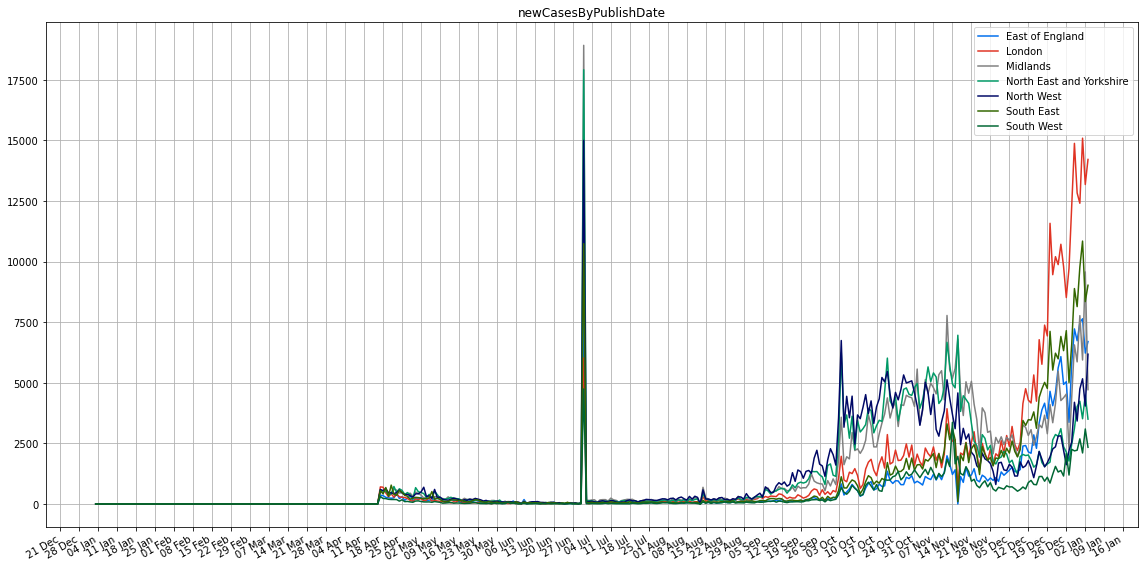

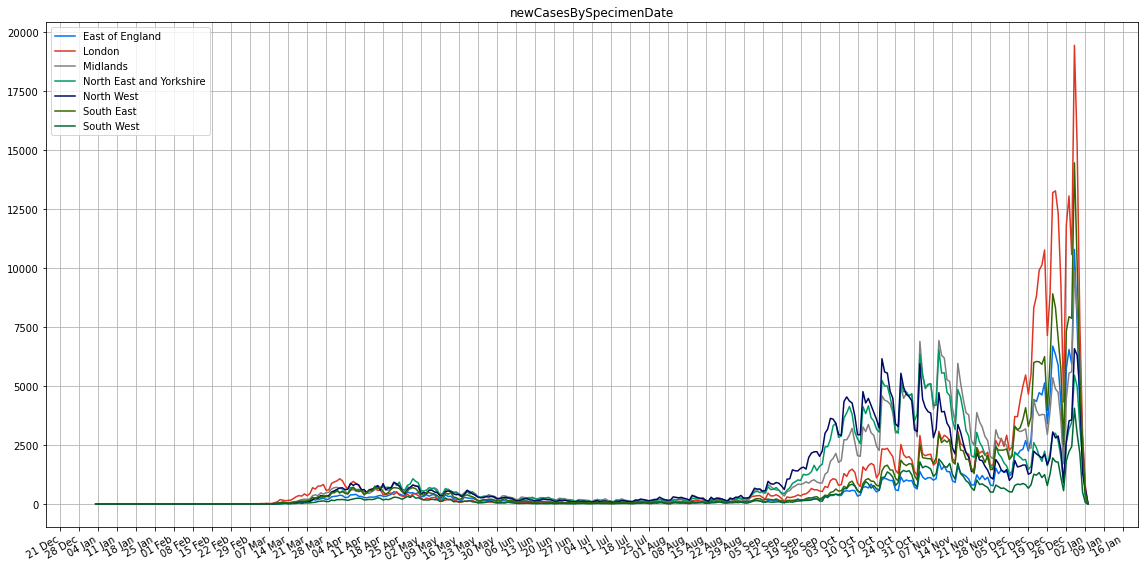

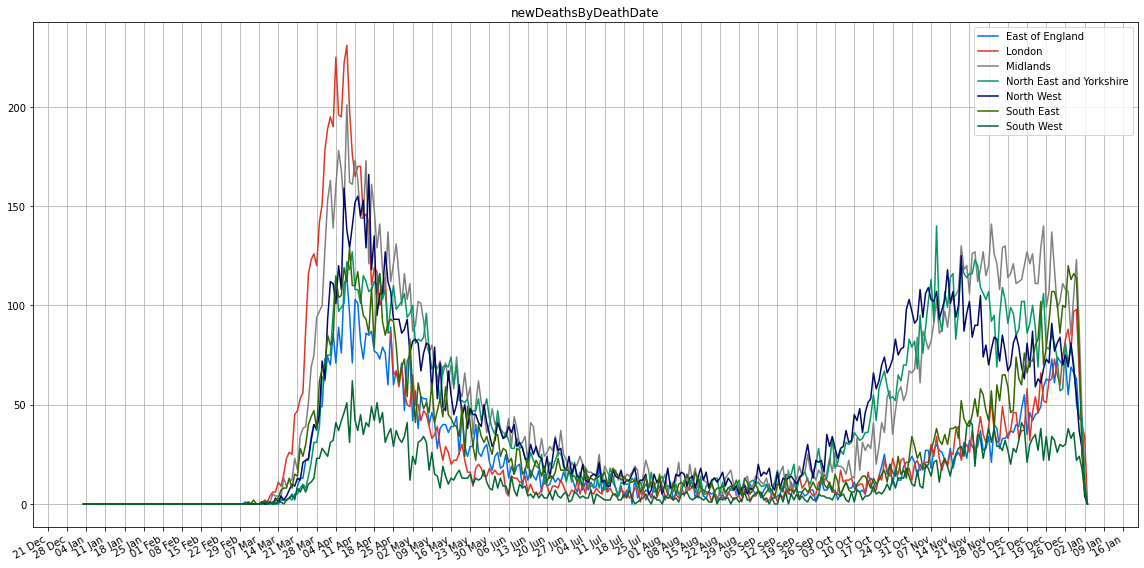

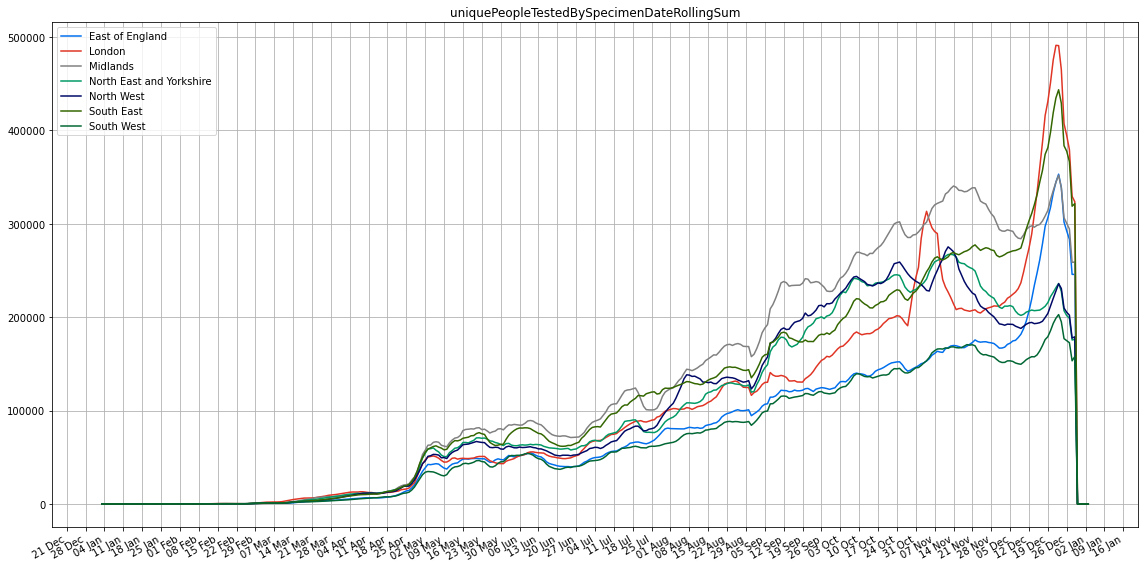

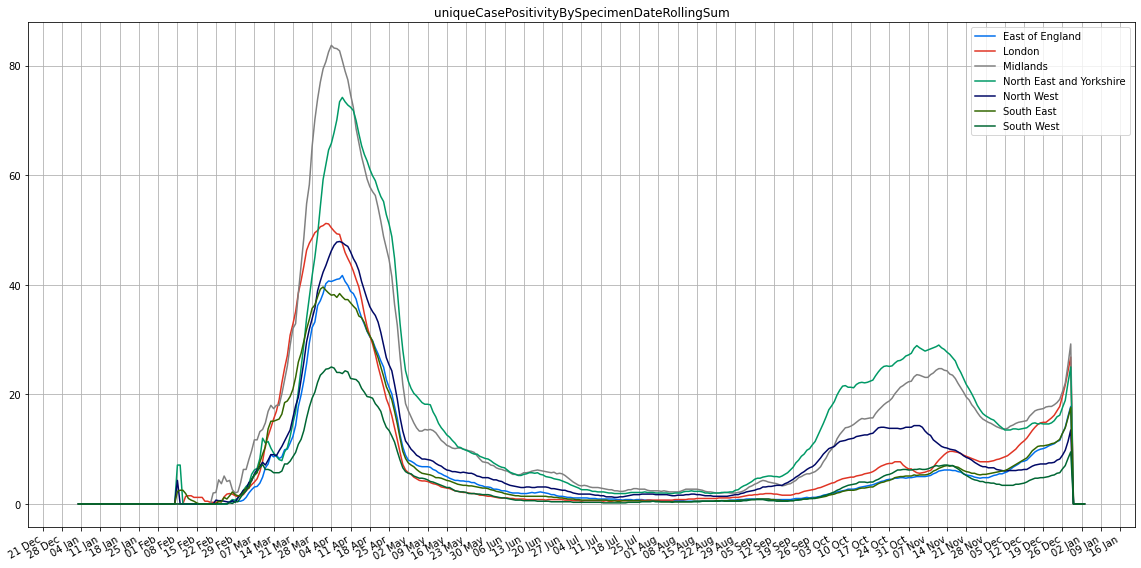

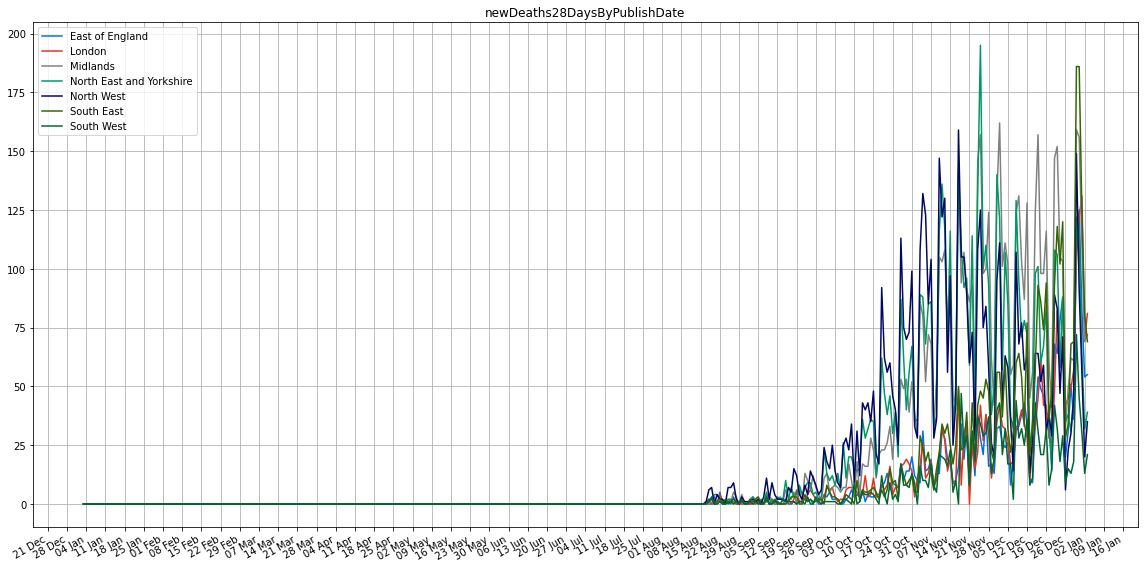

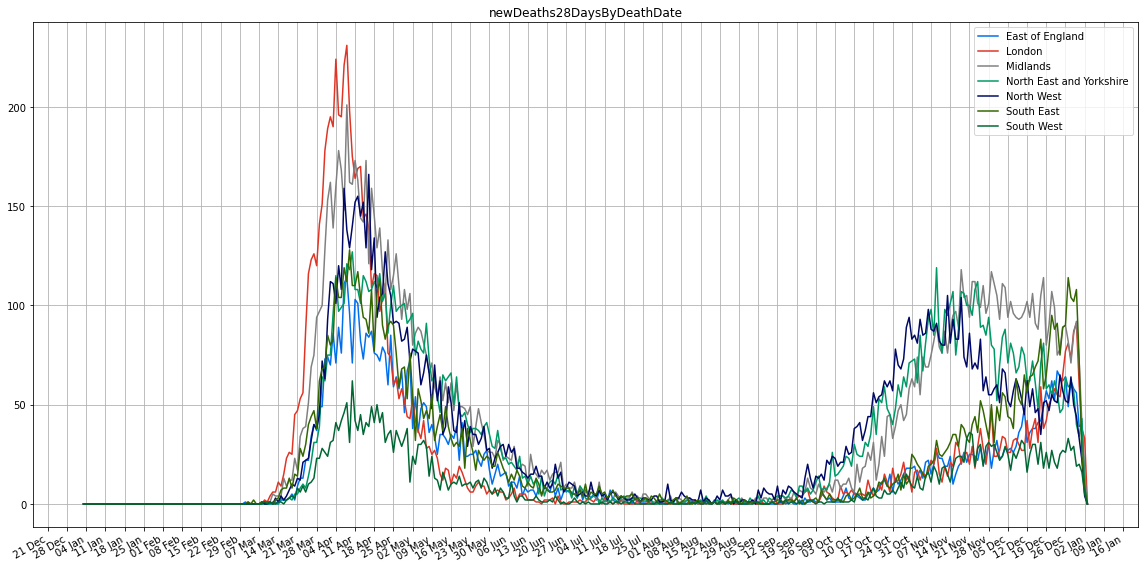

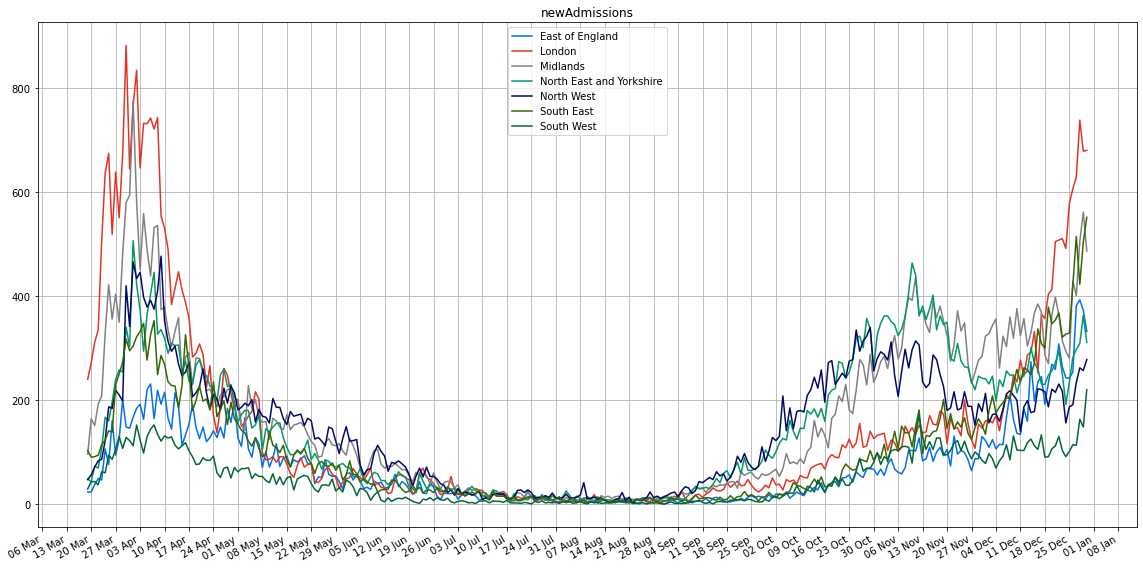

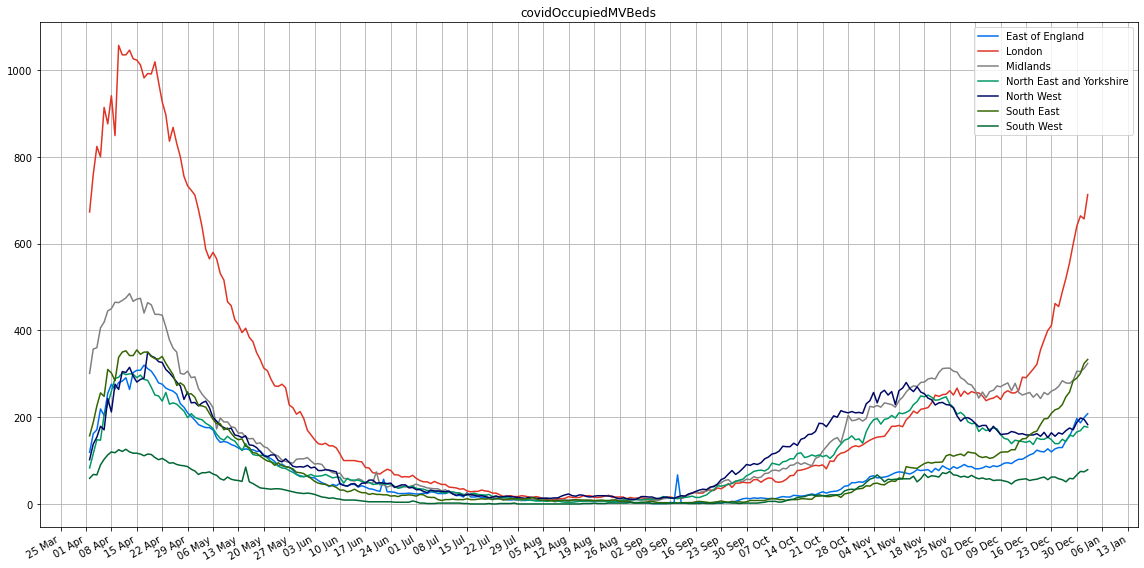

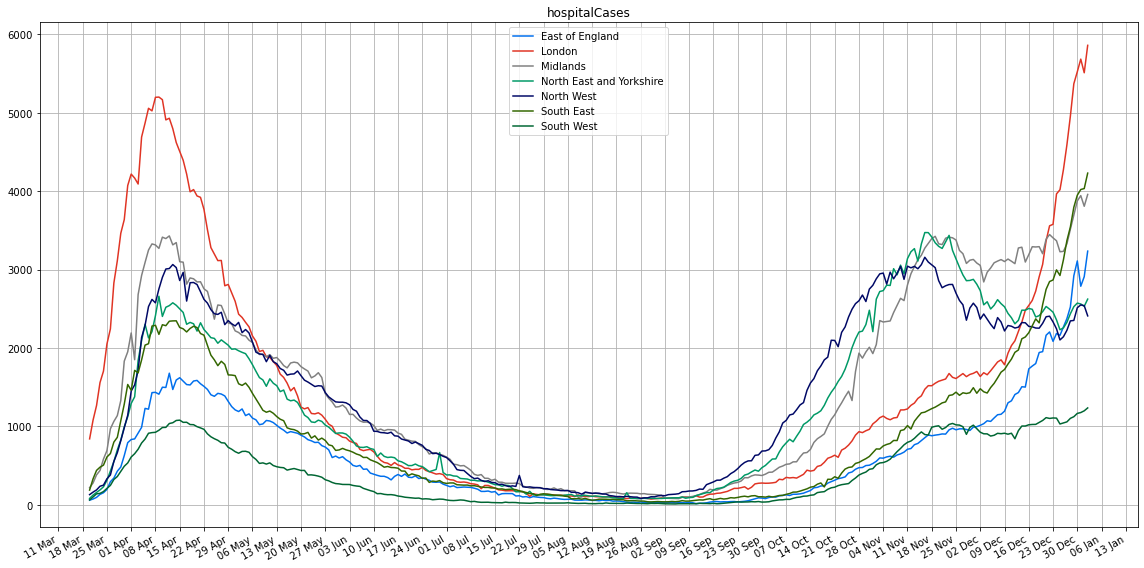

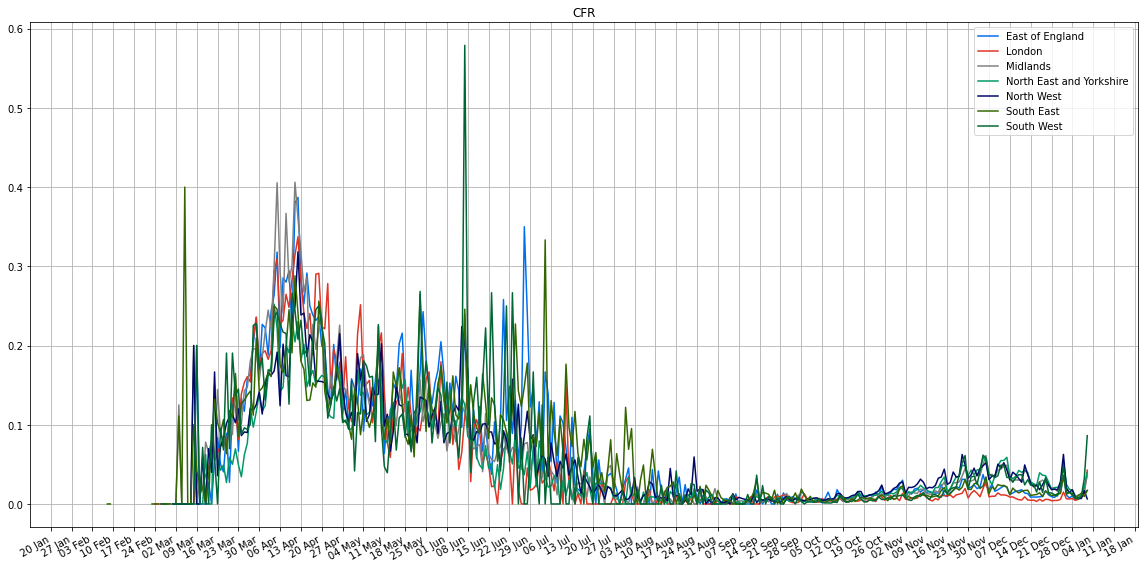

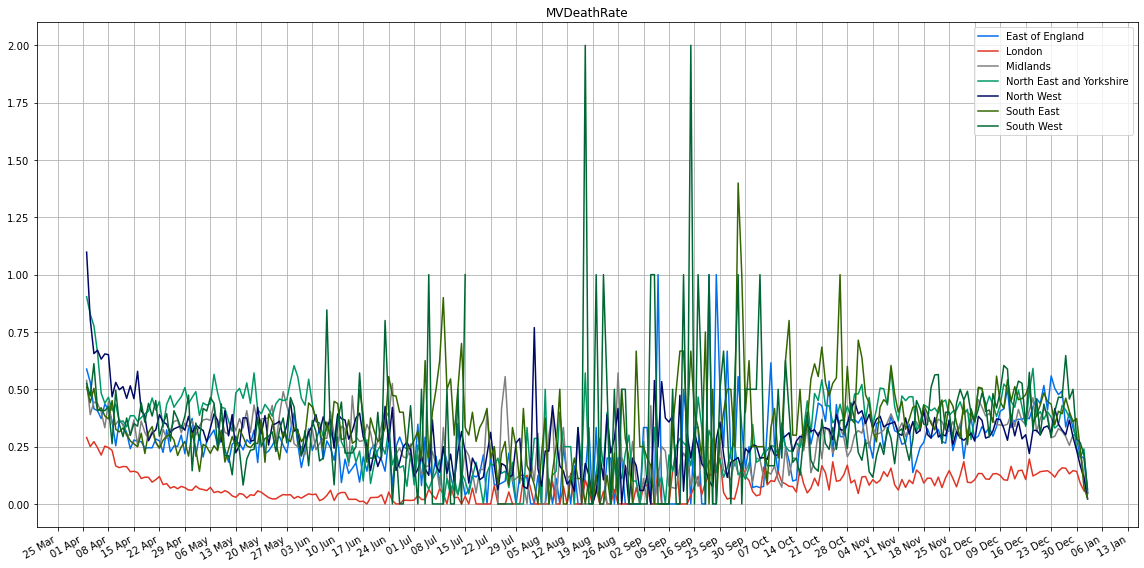

In [25]:
for metric in metrics + nhs_metrics + additional_metrics:
    if metric in df:
        plt.figure(figsize=(16,8))
        for i, region in enumerate(df['areaName'].unique()):
            df_region = df[df['areaName'] == region]
            plt.plot(df_region['date'], df_region[metric], label=region, color=colors[i])
        plt.legend()
        ax = plt.gca()
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
        #ax.set_xlim([datetime.datetime(2020, 10, 1), datetime.datetime.now()])
        ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
        plt.gcf().autofmt_xdate() # Rotation
        plt.grid()
        plt.title(metric)
        plt.tight_layout()
        plt.show()